In [1]:
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
import bs4
import requests

### Milestone 2

In [2]:
# Loading CSV data into data frame.
Covid_byState_df = pd.read_csv('Data/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')

# Checking the data.
Covid_byState_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,02/14/2020,AL,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,02/16/2020 12:00:00 AM,Agree,Agree
1,04/01/2021,CA,3570660,3570660.0,0.0,2234,0.0,58090,58090.0,0.0,154,0.0,04/03/2021 12:00:00 AM,Agree,Agree
2,05/31/2021,CA,3685032,3685032.0,0.0,644,0.0,62011,62011.0,0.0,5,0.0,06/02/2021 12:00:00 AM,Agree,Agree
3,07/14/2020,CA,336447,336447.0,0.0,7285,0.0,7039,7039.0,0.0,25,0.0,07/16/2020 12:00:00 AM,Agree,Agree
4,02/06/2020,NE,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [3]:
# Step 1:
# Identifying unwanted columns and deleting them from data frame as they are not required for our analysis.

# Removing unwanted columns from dataframe.
Covid_byState_df = Covid_byState_df.drop(['conf_cases','prob_cases','pnew_case','conf_death','prob_death','pnew_case','pnew_death','consent_cases','consent_deaths','created_at'], axis = 1)


In [4]:
# Step 2:
# Modifying the column name to appropriate name.
Covid_byState_df.rename(columns = {'submission_date':'reported_date'}, inplace = True)

# Checking the columns.
Covid_byState_df.columns

Index(['reported_date', 'state', 'tot_cases', 'new_case', 'tot_death',
       'new_death'],
      dtype='object')

In [5]:
# Step 3:
# Converting the data frame columns to appropriate datatypes.

# Checking the column data types.
Covid_byState_df.dtypes

reported_date    object
state            object
tot_cases         int64
new_case          int64
tot_death         int64
new_death         int64
dtype: object

In [6]:
# Converting 'submission_date' column to datetime datatype.
Covid_byState_df['reported_date'] = pd.to_datetime(Covid_byState_df['reported_date'])

# Checking the column data types.
Covid_byState_df.dtypes

reported_date    datetime64[ns]
state                    object
tot_cases                 int64
new_case                  int64
tot_death                 int64
new_death                 int64
dtype: object

In [7]:
# Step 4:
# Data Cleaning: Identifying and deleting the rows where total cases is 0.
Covid_byState_df.drop(Covid_byState_df[Covid_byState_df['tot_cases'] == 0].index, inplace = True)

# Checking the data.
Covid_byState_df[Covid_byState_df['tot_cases'] == 0]


,reported_date,state,tot_cases,new_case,tot_death,new_death


In [8]:
# Step 5:
# Identifying and removing the rows which are not in these fifty states.
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

Covid_byState_df.drop(Covid_byState_df[~Covid_byState_df['state'].isin(states)].index, inplace = True)

Covid_byState_df

,reported_date,state,tot_cases,new_case,tot_death,new_death
1,2021-04-01,CA,3570660,2234,58090,154
2,2021-05-31,CA,3685032,644,62011,5
3,2020-07-14,CA,336447,7285,7039,25
5,2020-07-30,ME,3910,22,123,2
6,2020-06-10,VT,1009,10,54,0
...,...,...,...,...,...,...
43854,2020-10-12,DC,16022,38,637,0
43855,2020-12-11,AZ,394804,6986,7245,91
43857,2020-12-15,DC,25339,301,720,4
43858,2021-07-06,OR,209494,117,2782,1


### Milestone 3

In [9]:
# Opening the web page to view the HTML source and to understand its structure.
web_page = open("Data/COVID-19 vaccination in the United States - Wikipedia.html","r")

# Reading the page using bs4.
soup = BeautifulSoup(web_page)
web_page.close()

# Finding the table needed for the exercise.
data_tbl = soup.find('table', {'class': 'wikitable sortable static-row-numbers jquery-tablesorter'})

# Getting the headers of table.
headers = [th.getText().strip() for th in data_tbl.findAll('thead')[0].findAll('th')]

# Getting the rows of table and adding to dataframe.
rows = data_tbl.findAll('tbody')[0].findAll('tr')[0:]
d_rows = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows]
Covid_Vaccinated_by_state_df = pd.DataFrame(d_rows, columns=headers)

# Checking the dataframe.
Covid_Vaccinated_by_state_df.head()

,State/Territory,Vaccinated,% of pop.
0,Alabama,"2,489,954",58.1%
1,Alaska,"473,411",64.7%
2,Arizona,"4,858,243",66.7%
3,Arkansas,"1,881,140",62.3%
4,California,"32,416,845",82.0%


In [10]:
# Step 1:
# Modifying the column name to appropriate name.

Covid_Vaccinated_by_state_df.rename(columns = {'State/Territory':'state','% of pop.':'pop %'}, inplace = True)

# Checking the columns.
Covid_Vaccinated_by_state_df.columns

Index(['state', 'Vaccinated', 'pop %'], dtype='object')

In [11]:
# Step 2:
# Adding new state column. We need it to join with flat file for further analysis.

# Loading states data to dataframe.
states_df = pd.read_csv('Data/States.csv')

# Removing unwanted columns from states dataframe.
states_df = states_df.drop(['Abbrev'], axis = 1)
states_df.columns = states_df.columns.str.lower()

# Merging two dataframes on state name to get state code.
Covid_Vaccinated_by_state_df = pd.merge(Covid_Vaccinated_by_state_df, states_df, on = 'state')

# Modifying the column name to appropriate name.
Covid_Vaccinated_by_state_df.rename(columns = {'state':'state name','code':'state'}, inplace = True)

# Checking the dataframe.
Covid_Vaccinated_by_state_df.head()

,state name,Vaccinated,pop %,state
0,Alabama,"2,489,954",58.1%,AL
1,Alaska,"473,411",64.7%,AK
2,Arizona,"4,858,243",66.7%,AZ
3,Arkansas,"1,881,140",62.3%,AR
4,California,"32,416,845",82.0%,CA


In [12]:
# Step 3:
# Reordering the columns in dataframe.

Covid_Vaccinated_by_state_df = Covid_Vaccinated_by_state_df[['state','state name','Vaccinated','pop %']]

# Checking dataframe.
Covid_Vaccinated_by_state_df.head()

,state,state name,Vaccinated,pop %
0,AL,Alabama,"2,489,954",58.1%
1,AK,Alaska,"473,411",64.7%
2,AZ,Arizona,"4,858,243",66.7%
3,AR,Arkansas,"1,881,140",62.3%
4,CA,California,"32,416,845",82.0%


In [13]:
# Step 4:
# Identifying outliers/bad data: Checking if there are any null values.

Covid_Vaccinated_by_state_df.isnull().sum()

state         0
state name    0
Vaccinated    0
pop %         0
dtype: int64

In [14]:
# Step 5:
# Finding duplicates: Checking if there are any duplicate values in state code.

Covid_Vaccinated_by_state_df['state'].duplicated().sum()

0

### Milestone 4

In [15]:
# Setting the api url.
url = 'https://data.cdc.gov/resource/rh2h-3yt2.json?$limit=60000'

# Get request. 
resp = requests.get(url)

# Extracting data using json method.
data = resp.json()

# Loading json data into data frame.
Covid_Vaccination_df = pd.DataFrame(data)

# Checking the data.
Covid_Vaccination_df.head()

,date,mmwr_week,location,administered_daily,administered_cumulative,administered_7_day_rolling,admin_dose_1_daily,admin_dose_1_cumulative,admin_dose_1_day_rolling,date_type,administered_daily_change,administered_daily_change_1,series_complete_daily,series_complete_cumulative,series_complete_day_rolling,booster_daily,booster_cumulative,booster_7_day_rolling_average
0,2022-03-05T00:00:00.000,9,MA,0,14312150,4466,0,6612384,1417,Admin,0,4466,0,5359606,982,0,2662958,1953
1,2022-03-05T00:00:00.000,9,NM,0,3780431,1162,0,1734441,294,Admin,0,1162,0,1463705,283,0,704403,451
2,2022-03-05T00:00:00.000,9,UT,0,5070331,17,0,2299431,6,Admin,0,18,0,2030274,7,0,870066,13
3,2022-03-05T00:00:00.000,9,ID,0,2372372,587,0,1067712,142,Admin,0,588,0,951089,206,0,389529,225
4,2022-03-05T00:00:00.000,9,PR,0,6971581,1418,0,3035910,244,Admin,0,1418,0,2608024,220,0,1392310,920


In [16]:
# Step 1:
# Identifying unwanted columns and deleting them from data frame as they are not required for our analysis.

# Removing unwanted columns from dataframe.
Covid_Vaccination_df = Covid_Vaccination_df.drop(['mmwr_week','administered_7_day_rolling',
                                          'admin_dose_1_daily','admin_dose_1_cumulative','admin_dose_1_day_rolling',
                                          'date_type','administered_daily_change','administered_daily_change_1',
                                          'series_complete_cumulative','series_complete_day_rolling',
                                          'booster_cumulative','booster_7_day_rolling_average'], axis = 1)

# Checking the data.
Covid_Vaccination_df.head()

,date,location,administered_daily,administered_cumulative,series_complete_daily,booster_daily
0,2022-03-05T00:00:00.000,MA,0,14312150,0,0
1,2022-03-05T00:00:00.000,NM,0,3780431,0,0
2,2022-03-05T00:00:00.000,UT,0,5070331,0,0
3,2022-03-05T00:00:00.000,ID,0,2372372,0,0
4,2022-03-05T00:00:00.000,PR,0,6971581,0,0


In [17]:
# Step 2:
# Modifying the column name to appropriate name.
Covid_Vaccination_df.rename(columns = {'date':'reported_date','location':'state','administered_daily':'vaccinated_daily',
                                   'series_complete_daily':'fullyvaccinated_daily','administered_cumulative':'vaccinated_cumulative'}, inplace = True)

# Checking the columns.
Covid_Vaccination_df.columns

Index(['reported_date', 'state', 'vaccinated_daily', 'vaccinated_cumulative',
       'fullyvaccinated_daily', 'booster_daily'],
      dtype='object')

In [18]:
# Step 3:
# Converting the data frame columns to appropriate datatypes.

# Checking the column data types.
Covid_Vaccination_df.dtypes

reported_date            object
state                    object
vaccinated_daily         object
vaccinated_cumulative    object
fullyvaccinated_daily    object
booster_daily            object
dtype: object

In [19]:
# Converting 'submission_date' column to datetime datatype.
Covid_Vaccination_df['reported_date'] = pd.to_datetime(Covid_Vaccination_df['reported_date'])

# Converting 'vaccinated_daily,fullyvaccinated_daily,booster_daily' columns to int datatype.
Covid_Vaccination_df['vaccinated_daily'] = pd.to_numeric(Covid_Vaccination_df['vaccinated_daily'])
Covid_Vaccination_df['fullyvaccinated_daily'] = pd.to_numeric(Covid_Vaccination_df['fullyvaccinated_daily'])
Covid_Vaccination_df['booster_daily'] = pd.to_numeric(Covid_Vaccination_df['booster_daily'])
Covid_Vaccination_df['vaccinated_cumulative'] = pd.to_numeric(Covid_Vaccination_df['vaccinated_cumulative'])

# Checking the column data types.
Covid_Vaccination_df.dtypes

reported_date            datetime64[ns]
state                            object
vaccinated_daily                  int64
vaccinated_cumulative             int64
fullyvaccinated_daily             int64
booster_daily                     int64
dtype: object

In [20]:
# Step 4:
# Data Cleaning: Checking missing data.
Covid_Vaccination_df.isna().sum()

reported_date            0
state                    0
vaccinated_daily         0
vaccinated_cumulative    0
fullyvaccinated_daily    0
booster_daily            0
dtype: int64

In [21]:
# Step 5:
# Identifying and removing the rows which are not in these fifty states.
states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

Covid_Vaccination_df.drop(Covid_Vaccination_df[~Covid_Vaccination_df['state'].isin(states)].index, inplace = True)

# Deleting the unwanted rows.
Covid_Vaccination_df.drop(Covid_Vaccination_df[(Covid_Vaccination_df.vaccinated_daily == 0) & (Covid_Vaccination_df.fullyvaccinated_daily == 0) & (Covid_Vaccination_df.booster_daily == 0)].index, inplace = True)
Covid_Vaccination_df.drop(Covid_Vaccination_df[(Covid_Vaccination_df.vaccinated_daily < 0)].index, inplace = True)

# Checking the data.
Covid_Vaccination_df.head()

,reported_date,state,vaccinated_daily,vaccinated_cumulative,fullyvaccinated_daily,booster_daily
14,2022-03-05,AL,2941,6114782,1044,1128
16,2022-03-05,WA,8831,13895843,2252,4331
20,2022-03-05,ID,1433,2372372,395,383
22,2022-03-05,ND,154,1064926,60,38
23,2022-03-05,KS,3957,4457284,1537,1116


### Milestone 5

In [419]:
import sqlite3 as sql

In [446]:
# Loading the datasets into a database.
conn = sql.connect('CovidData.db')

# Creating dataframe as tables into database.
Covid_byState_df.to_sql('Covid_byState_tbl', conn)
Covid_Vaccinated_by_state_df.to_sql('Covid_Vaccinated_byState_tbl', conn)
Covid_Vaccination_df.to_sql('Covid_Vaccination_tbl', conn)

44717

In [445]:
#Creating a cursor object using the cursor() method
cursor = conn.cursor()

#Doping EMPLOYEE table if already exists
cursor.execute("DROP TABLE Covid_byState_tbl")
cursor.execute("DROP TABLE Covid_Vaccinated_byState_tbl")
cursor.execute("DROP TABLE Covid_Vaccination_tbl")


#Commit your changes in the database
conn.commit()

In [447]:
Covid_byState_df = pd.read_sql('SELECT * FROM Covid_byState_tbl', conn)
Covid_byState_df.shape

(35208, 8)

In [448]:
Covid_Vaccinated_by_state_df = pd.read_sql('SELECT * FROM Covid_Vaccinated_bystate_tbl', conn)
Covid_Vaccinated_by_state_df.shape

(51, 6)

In [449]:
Covid_Vaccination_df = pd.read_sql('SELECT * FROM Covid_Vaccination_tbl', conn)
Covid_Vaccination_df.shape

(44717, 7)

In [450]:
# Merging the first two datasets.
Covid_Vac_Count_df = pd.merge(Covid_byState_df, Covid_Vaccinated_by_state_df[['state','state name','Vaccinated','pop %']], on='state')
                                                                             

In [451]:
# Merging with third dataset.
Covid_alldata_df = Covid_Vac_Count_df.merge(Covid_Vaccination_df[['state','reported_date','vaccinated_daily','fullyvaccinated_daily','booster_daily','vaccinated_cumulative']], how='left', on = ['state','reported_date'])

# Removing nan values.
Covid_alldata_df = Covid_alldata_df.fillna(0)

# Viewing final dataset.
Covid_alldata_df.head()

,level_0,index,reported_date,state,tot_cases,new_case,tot_death,new_death,state name,Vaccinated,pop %,vaccinated_daily,fullyvaccinated_daily,booster_daily,vaccinated_cumulative
0,0,1,2021-04-01 00:00:00,CA,3570660,2234,58090,154,California,"32,416,845",82.0%,517979.0,232237.0,0.0,21216019.0
1,0,1,2021-04-01 00:00:00,CA,3570660,2234,58090,154,California,"32,416,845",82.0%,380752.0,137303.0,0.0,18604164.0
2,1,2,2021-05-31 00:00:00,CA,3685032,644,62011,5,California,"32,416,845",82.0%,20949.0,13926.0,0.0,39532587.0
3,1,2,2021-05-31 00:00:00,CA,3685032,644,62011,5,California,"32,416,845",82.0%,136519.0,69117.0,0.0,38398021.0
4,2,3,2020-07-14 00:00:00,CA,336447,7285,7039,25,California,"32,416,845",82.0%,0.0,0.0,0.0,0.0


### Visualization 1: Daily New Cases

In [426]:
import matplotlib.pyplot as plt

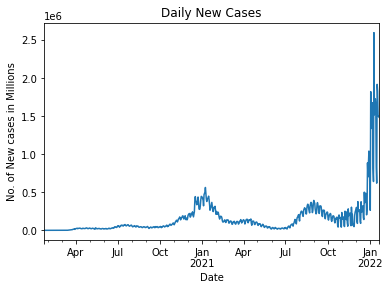

In [576]:
# Plotting daily new cases.
Covid_alldata_df['reported_date'] =  pd.to_datetime(Covid_alldata_df['reported_date'])
Covid_alldata_df.groupby('reported_date')['new_case'].sum().plot(kind='line')
plt.title('Daily New Cases')          
plt.xlabel('Date')  
plt.ylabel('No. of New cases in Millions')
plt.show()

### Visualization 2: Daily New Deaths

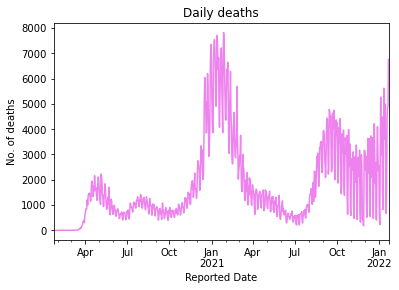

In [497]:
# Plotting daily new deaths.
Covid_alldata_df['reported_date'] =  pd.to_datetime(Covid_alldata_df['reported_date'])
Covid_alldata_df.groupby('reported_date')['new_death'].sum().plot(kind='line',color = 'violet')
plt.title('Daily deaths')          
plt.xlabel('Date')  
plt.ylabel('No. of deaths')
plt.show()

### Visualization 3: Total administered vaccinations graph

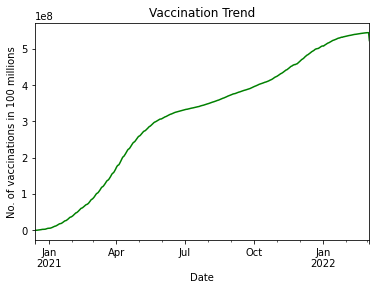

In [575]:
# Plotting administered vaccinations graph
grouped_df = Covid_Vaccination_df.groupby(['reported_date','state'])['vaccinated_cumulative'].max()
vaccinated_grouped_df = grouped_df.reset_index()
vaccinated_grouped_df['reported_date'] =  pd.to_datetime(vaccinated_grouped_df['reported_date'])
vaccinated_grouped_df.groupby(['reported_date'])['vaccinated_cumulative'].sum().plot(kind='line', color= 'green')
plt.title('Vaccination Trend')          
plt.xlabel('Date')  
plt.ylabel('No. of vaccinations in 100 millions')
plt.show()

### Visualization 4: Top 10 States with most deaths and Top 10 States with most vaccinations

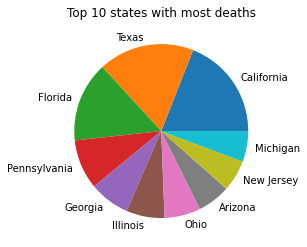

In [573]:
#Plotting the Top 10 states with most deaths
Covid_alldata_df.groupby('state name')['new_death'].sum().nlargest(10).plot(kind='pie')
plt.title('Top 10 states with most deaths')           
plt.ylabel('')
plt.show()

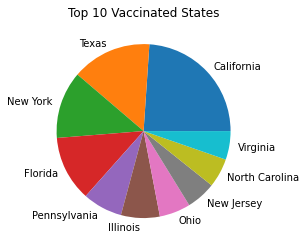

In [574]:
#Plotting the Top 10 fully vaccinated states
Covid_alldata_df.groupby('state name')['vaccinated_cumulative'].max().nlargest(10).plot(kind='pie')
plt.title('Top 10 Vaccinated States')           
plt.ylabel('')
plt.show()

### Visualization 5: Top 15 Vaccinated percentage states

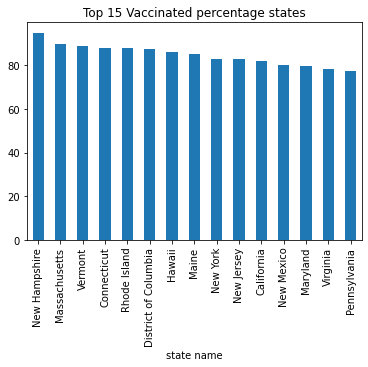

In [577]:
# Plotting the Top 15 Vaccinated percentage states as Bar
Covid_alldata_df['pop %'] =  pd.to_numeric(Covid_alldata_df['pop %'])
Covid_alldata_df.groupby('state name')['pop %'].max().nlargest(15).plot(kind='bar')
plt.title('Top 15 Vaccinated percentage states')           
plt.ylabel('')
plt.show()

### Summary:
In the current pandemic, due to COVID-19, people who had not been vaccinated has a higher chance of testing positive for COVID-19 and dying from COVID-19 than those who had been fully vaccinated. Unvaccinated persons had greater case and mortality rates in all age categories than fully vaccinated people of the same age. In this analysis, we wanted to understand the extent of control of deaths and spread of Covid-19 after the vaccinations are approved and started to distribute in United States.

#### Visualizations:
Besides showing the numbers, each vizualization shows the impact and the reciprocations taken by the US govt after the massive spread of Covid-19 in US.
* Visualization 1 - Daily New Cases shows the trend of increase in the number of new cases every day in the US. The number of new cases rapidly increase during the months of Dec 2021 and Jan 2022. This is mainly because of the new variant of the Covid-19. The spread of this new variant was extremely high so the number of daily new cases also increased. 
* That being said, during this same period, the number of daily deaths due to Covid-19 did not get exponentially like the number of new cases, as per the Visualization 3 - Daily New Death. This is because United States had the highest number of vaccinated people according to Visualization 3 - Total administered vaccinations graph. This shows the significance and important of being vaccinated. It shows the success of US govt to have the vaccinations administered properly over the country rapidly. Additionally, I wanted to show how each State has reacted to the increase in deaths due to Covid-19. 
* Visualization 4 - Top 10 States with most deaths and Top 10 States with most vaccinations tells us the Top 10 states had most deaths due to Covid-19 and almost all of the had to have rapid increase in vaccinations too. This also in a way tells us vaccinations is one of the few ways to fight this global pandemic. 
* And lastly, the Visualization 5 - Top 15 Vaccinated percentage states tells us what are the states that effectively get vaccinated to avoid this massive spread of this virus. 

So, this tells us one of the ways to increase our chances of surviving Covid-19 infection is to get fully vaccinated. The more the population that get vaccinated, the lesser is the number of deaths due to Covid-19. United States government did a very good job in providing the vaccinations to the people. The Centers for Disease Control and Prevention said on Friday that about 253.9 million people had received at least one dose of a Covid-19 vaccine, including about 216 million people who had been fully vaccinated by the Johnson & Johnson single-dose vaccine or the two-dose series made by Pfizer-BioNTech and Moderna. The C.D.C. also reported that about 94.9 million fully vaccinated people have received an additional vaccine dose or a booster dose, the highest level of protection against the virus.
All across the country, mask mandates have eased, restrictions have lifted and most states have gone back to business as usual. It appears nearly the entire country will be open with few restrictions by the Fourth of July! Wishing for the best.